## [Problem 1] Select features and categories for practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_df = load_iris()

iris_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
iris_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris_df.target_names

# 0 = setosa 
# 1 = "versicolor"
# 2 = "virginca"

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# get the feature data

features_df = pd.DataFrame(iris_df.data,columns=iris_df.feature_names)

# selecte sepal length (cm) and petal length (cm)

features_df = features_df[["sepal length (cm)", "petal length (cm)"]]

# get the target
target_df = pd.DataFrame(iris_df.target,columns=["species"])

# creat new_df with concatenate

df = pd.concat([features_df,target_df], axis=1)

# select # 1 = "versicolor" and  2 = "virginca"
df = df.loc[(df.species==1) | (df.species==2)]

df.head()

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


## [Problem 2] Data analysis


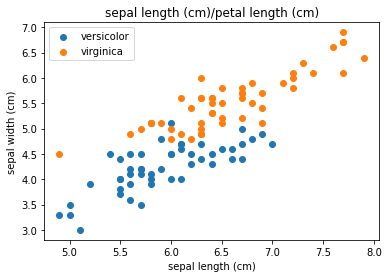

In [5]:
versicolor = df[df["species"]==1]
virginica = df[df["species"]==2]


plt.title("sepal length (cm)/petal length (cm)")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(versicolor.loc[:,"sepal length (cm)"],versicolor.loc[:,"petal length (cm)"],label="versicolor")
plt.scatter(virginica.loc[:,"sepal length (cm)"],virginica.loc[:,"petal length (cm)"],label="virginica")

plt.legend()


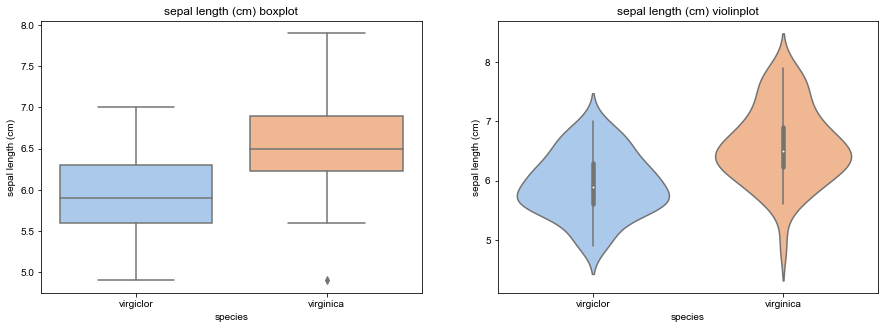

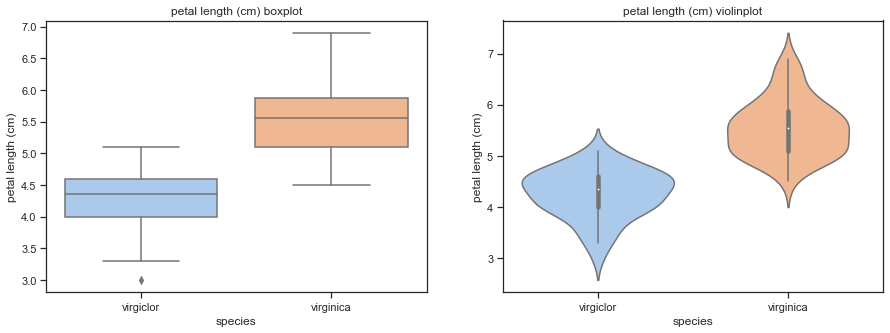

In [6]:
import seaborn as sns

features = df.columns[0:2]

for feature in features:
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    sns.set_theme(style="ticks", palette="pastel")
    
    feature
    # box plot
    sns.boxplot(x=df["species"],y=df[feature], data=df,ax=axes[0])
    axes[0].set_xticklabels(['virgiclor','virginica'])
    axes[0].set_title('{} boxplot'.format(feature))

    #violin plot()
    sns.violinplot(x=df["species"], y=df[feature],data=df,ax=axes[1])
    axes[1].set_xticklabels(['virgiclor','virginica'])
    axes[1].set_title('{} violinplot'.format(feature))

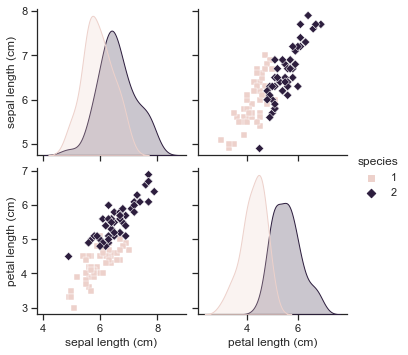

In [7]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df, diag_kind="kde",hue='species',markers=["s", "D"])

## [Problem 3] Division of preprocessing/training data and verification data


In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

import numpy as np
from sklearn.model_selection import train_test_split

#varibles explicatives
X = np.array(df[["sepal length (cm)", "petal length (cm)"]])

#varibles objectives
y = np.array(df["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## [Problem 4] Pretreatment/Standardization

In [9]:
# https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm
# https://towardsdatascience.com/k-nearest-neighbors-94395f445221

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## [Problem 5] Learning and estimation

KNN ou K-nearest neighbors est une méthode d’apprentissage non paramétrique en apprentissage automatique, principalement utilisée pour les techniques de classification et de régression. Il est considéré comme l’un des algorithmes les plus simples de l’apprentissage automatique.

In [10]:
knn_5 = KNeighborsClassifier(n_neighbors=5) 
knn_5.fit(X_train,y_train)
pred_5 = knn_5.predict(X_test) 

pred_5

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

In [11]:
knn_3 = KNeighborsClassifier(n_neighbors=3) 
knn_3.fit(X_train,y_train)
pred_3 = knn_3.predict(X_test) 

pred_3

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors=1) 
knn_1.fit(X_train,y_train)
pred_1 = knn_1.predict(X_test) 

pred_1

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

## [Problem 6] Evaluation

In [13]:
# https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, precision_recall_fscore_support, confusion_matrix

preds = [pred_1, pred_3, pred_5]
knns = [knn_1, knn_3, knn_5]
i=0
for pred in preds:
    print(knns[i])
    print('Precision                                   : %.3f'%precision_score(y_test, pred))
    print('Recall                                      : %.3f'%recall_score(y_test, pred))
    print('F1-Score                                    : %.3f'%f1_score(y_test, pred))
    print("accuracy                                    : %.3f"%accuracy_score(y_true=y_test, y_pred=pred))
    print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, pred))
    print('\nClassification Report                       : ')
    print(classification_report(y_test, pred))
    print('\nconfusion matrix                     : ')
    print(confusion_matrix(y_test, pred))
    print('-'*70)
    i += 1

KNeighborsClassifier(n_neighbors=1)
Precision                                   : 0.800
Recall                                      : 0.857
F1-Score                                    : 0.828
accuracy                                    : 0.800

Precision Recall F1-Score Support Per Class : 
 (array([0.8, 0.8]), array([0.85714286, 0.72727273]), array([0.82758621, 0.76190476]), array([14, 11]))

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.73      0.76        11

    accuracy                           0.80        25
   macro avg       0.80      0.79      0.79        25
weighted avg       0.80      0.80      0.80        25


confusion matrix                     : 
[[12  2]
 [ 3  8]]
----------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
Precision                                   : 0.800
Recall    

### Confusion Matrix
For binary and multi-class classification problems, confusion matrix is another metrics which helps in indentifying which classes are easy to predict and which are hard to predict. It provides how many samples for each class are correctly classified and how many are confused with other classes.

### Classification Report
Classification report metrics provides precision, recall, f1-score and support for each class.

- **Precision** - It represents how many of predictions of particular class are actually of that class.  𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃)Precision=TP/(TP+FP) .
- **Recall** - It represents how many predictions of particular class is right.  𝑅𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁)Recall=TP/(TP+FN) .
- **f1-score** - It's geometric average of precision & recall.  𝐹1−𝑆𝑐𝑜𝑟𝑒=2∗(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑟𝑒𝑐𝑎𝑙𝑙)/(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑟𝑒𝑐𝑎𝑙𝑙)F1−Score=2∗(Precision∗recall)/(Precision+recall) 
- **support** - It represents number of occurances of particular class in y_true

The classification report is necessary when we want to analyze the performance of a model on individual classes. We want to check whether our model is not biassed towards one class. It helps in the case of unbalanced classes as we can understand the performance of a model on individual class. We can further improve the performance of a model by analyzing the performance of it in individual classes using this report.

Let’s go below through imbalanced class scenario to understand more and introduce the concept pf ROC Curves. We'll create a new dataset of 1000 samples, 10 classes and make it an imbalance for our purpose.

## [Problème 7] Visualisation

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision region KNeighborsClassifier(n_neighbors=1)


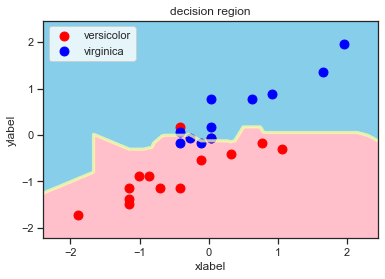

decision region KNeighborsClassifier(n_neighbors=3)


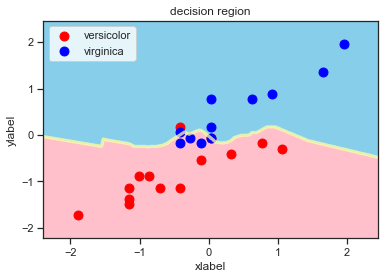

decision region KNeighborsClassifier()


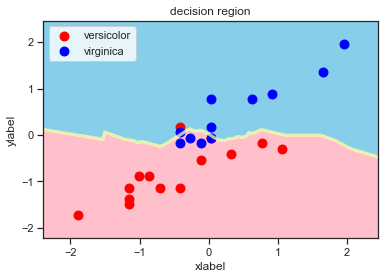

In [15]:
knns = [knn_1, knn_3, knn_5] #models

for model in knns:
    print("decision region {}".format(str(model)))
    decision_region(X_test, y_test, model)


## [Problem 8] Learning by other methods

- ## LogisticRegression

In [16]:
# Import packages, functions, and classes
# https://realpython.com/logistic-regression-python/

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train, y_train)


# predicte
y_pred1 = model1.predict(X_test)

y_pred1

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

- ### SVM

**SVM (Support Vector Machine)**
Dans le domaine de l’apprentissage automatique, le SVM ou Support Vector Machine est un algorithme d’apprentissage dans lequel l’algorithme analyse les données et construit un modèle qui est utilisé principalement pour les techniques de classification ou de régression de l’apprentissage automatique. Ici, dans notre cas, nous utilisons le modèle SVM pour la classification.

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model2 = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

y_pred2

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

- ## Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

y_pred3

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

- ## Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

y_pred4 = model4.predict(X_test)
y_pred4

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

- ### EVALUATE EACH MODEL

In [20]:
labels = ["Logistic Regression", "SVM", "Decision tree", "Random forest" ]
y_preds = [y_pred1, y_pred2, y_pred3, y_pred4]
models = [model1, model2, model3, model4]

# Evaluate the model
def evaluate(y_pred):
    print('Precision                                   : %.3f'%precision_score(y_test, y_pred))
    print('Recall                                      : %.3f'%recall_score(y_test, y_pred))
    print('F1-Score                                    : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))
    print("accuracy                                    : %.3f"%accuracy_score(y_true=y_test, y_pred=y_pred))

    print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_pred))
    print('\nClassification Report                       : ')
    print(classification_report(y_test, y_pred))
    print('\nconfusion matrix                     : ')
    print(confusion_matrix(y_test, y_pred))
    print('-'*70)

for i,y_pred in enumerate(y_preds,0):
    print(labels[i])
    print('-'*70)
    evaluate(y_pred)

Logistic Regression
----------------------------------------------------------------------
Precision                                   : 0.812
Recall                                      : 0.929
F1-Score                                    : 0.867
accuracy                                    : 0.840

Precision Recall F1-Score Support Per Class : 
 (array([0.8125    , 0.88888889]), array([0.92857143, 0.72727273]), array([0.86666667, 0.8       ]), array([14, 11]))

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.89      0.73      0.80        11

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83        25
weighted avg       0.85      0.84      0.84        25


confusion matrix                     : 
[[13  1]
 [ 3  8]]
----------------------------------------------------------------------
SVM
-------------------------

- ### VISUALISATION OF EACH MODEL

Logistic Regression
----------------------------------------------------------------------


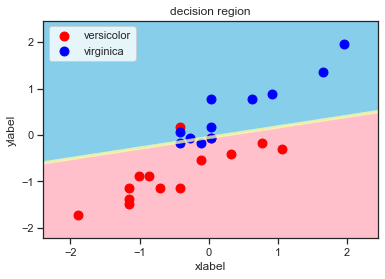

SVM
----------------------------------------------------------------------


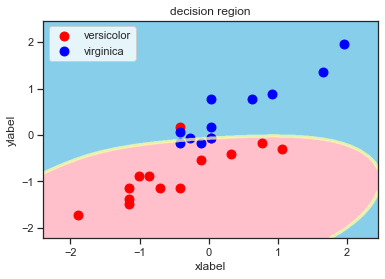

Decision tree
----------------------------------------------------------------------


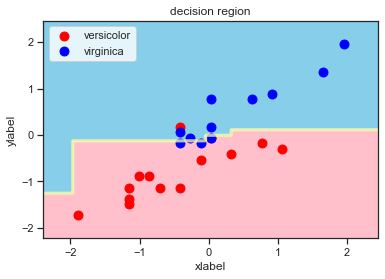

Random forest
----------------------------------------------------------------------


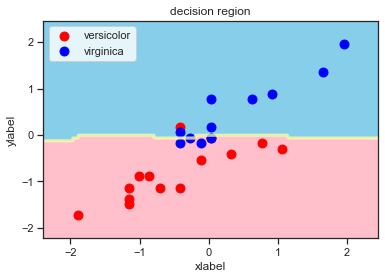

In [21]:
# Visualise the model
for i,model in enumerate(models,0):
    print(labels[i])
    print('-'*70)
    decision_region(X_test, y_test, model)

**La precision de la prediction pour semble la meme pour tous les models sauf le Random forest qui semble un peu plus bas de meme que le KNeighborsClassifier.**

- ## [Problem 9] (Advanced task) Comparison with and without standardization


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df[["sepal length (cm)", "petal length (cm)"]])
y = np.array(df["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# KNeighborsClassifier
modelknn_3 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
pred_knn = modelknn_3.predict(X_test) 


# LogisticRegression
model_LR = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)


#SVM 
model_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)


#Decision tree
model_DT = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)


#Random forest
model_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)



labels = ["KNeighborsClassifier","Logistic Regression", "SVM", "Decision tree", "Random forest" ]
y_preds = [pred_knn, y_pred_LR, y_pred_SVM, y_pred_DT, y_pred_RF]
models = [modelknn_3, model_LR, model_SVM, model_DT, model_RF]    

In [24]:
# evaluate model 
for i,y_pred in enumerate(y_preds,0):
    print(labels[i])
    print('-'*70)
    evaluate(y_pred)

KNeighborsClassifier
----------------------------------------------------------------------
Precision                                   : 0.765
Recall                                      : 0.929
F1-Score                                    : 0.839
accuracy                                    : 0.800

Precision Recall F1-Score Support Per Class : 
 (array([0.76470588, 0.875     ]), array([0.92857143, 0.63636364]), array([0.83870968, 0.73684211]), array([14, 11]))

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.88      0.64      0.74        11

    accuracy                           0.80        25
   macro avg       0.82      0.78      0.79        25
weighted avg       0.81      0.80      0.79        25


confusion matrix                     : 
[[13  1]
 [ 4  7]]
----------------------------------------------------------------------
Logistic Regression
--------

KNeighborsClassifier
----------------------------------------------------------------------


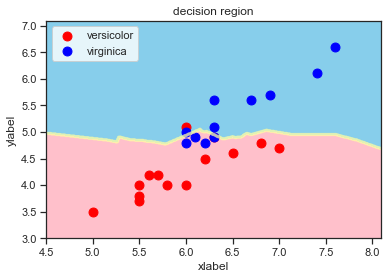

Logistic Regression
----------------------------------------------------------------------


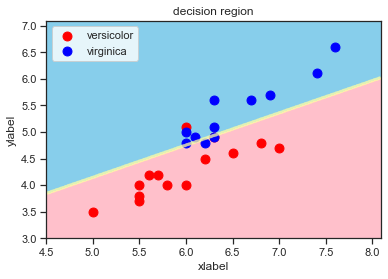

SVM
----------------------------------------------------------------------


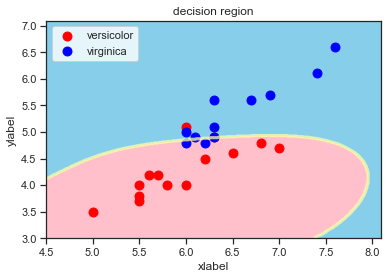

Decision tree
----------------------------------------------------------------------


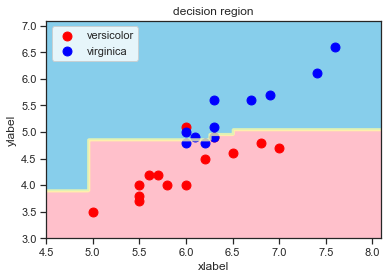

Random forest
----------------------------------------------------------------------


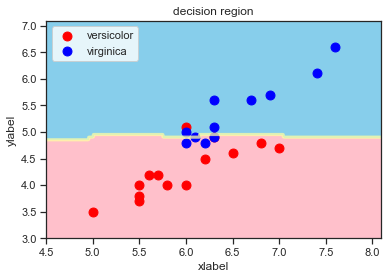

In [25]:
# Visualise the model
for i,model in enumerate(models,0):
    print(labels[i])
    print('-'*70)
    decision_region(X_test, y_test, model)

- #### Nous remarquons que sans la normalisation, il y a une difference de precision surtout pour le model de Logistique Regression

In [26]:
features_df = pd.DataFrame(iris_df.data,columns=iris_df.feature_names)
features_df = features_df[["sepal length (cm)", "petal length (cm)"]]
target_df = pd.DataFrame(iris_df.target,columns=["species"])
df = pd.concat([features_df,target_df], axis=1)

df.head()

,sepal length (cm),petal length (cm),species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [27]:
#varibles explicatives
X = np.array(df[["sepal length (cm)", "petal length (cm)"]])

#varibles objectives
y = np.array(df["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# KNeighborsClassifier
modelknn_3 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
pred_knn = modelknn_3.predict(X_test) 


# LogisticRegression
model_LR = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)


#SVM 
model_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)


#Decision tree
model_DT = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)


#Random forest
model_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)


In [31]:
# Evaluate the model
def evaluate2(y_pred):
    print('Precision                                   : %.3f'%precision_score(y_test, y_pred,average='weighted'))
    print('Recall                                      : %.3f'%recall_score(y_test, y_pred,average='weighted'))
    print('F1-Score                                    : %.3f'%f1_score(y_true=y_test, y_pred=y_pred,average='weighted'))
    print("accuracy                                    : %.3f"%accuracy_score(y_true=y_test, y_pred=y_pred))

    print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_pred,average='weighted'))
    print('\nClassification Report                       : ')
    print(classification_report(y_test, y_pred))
    print('\nconfusion matrix                     : ')
    print(confusion_matrix(y_test, y_pred))
    print('-'*70)

In [29]:

labels = ["KNeighborsClassifier","Logistic Regression", "SVM", "Decision tree", "Random forest" ]
y_preds = [pred_knn, y_pred_LR, y_pred_SVM, y_pred_DT, y_pred_RF]
models = [modelknn_3, model_LR, model_SVM, model_DT, model_RF]    

In [32]:
# evaluate model 
for i,y_pred in enumerate(y_preds,0):
    print(labels[i])
    print('-'*70)
    evaluate2(y_pred)

KNeighborsClassifier
----------------------------------------------------------------------
Precision                                   : 0.976
Recall                                      : 0.974
F1-Score                                    : 0.974
accuracy                                    : 0.974

Precision Recall F1-Score Support Per Class : 
 (0.975877192982456, 0.9736842105263158, 0.9736842105263158, None)

Classification Report                       : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


confusion matrix                     : 
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]
----------------------------------------------------------------------
Logisti

In [39]:
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue','green']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

KNeighborsClassifier
----------------------------------------------------------------------


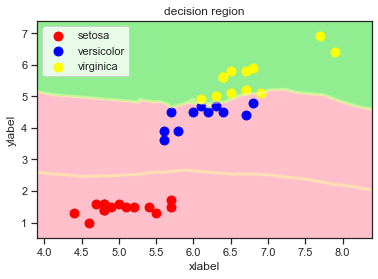

Logistic Regression
----------------------------------------------------------------------


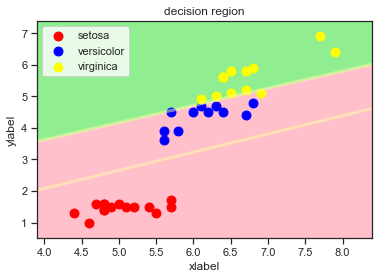

SVM
----------------------------------------------------------------------


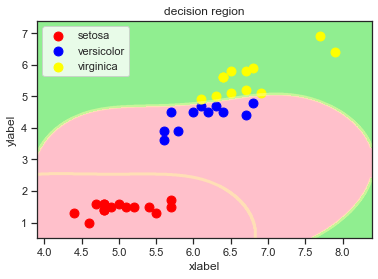

Decision tree
----------------------------------------------------------------------


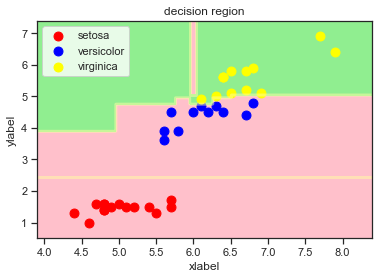

Random forest
----------------------------------------------------------------------


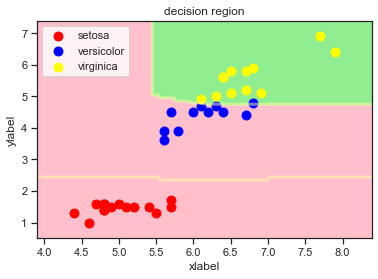

In [38]:
# Visualise the model
for i,model in enumerate(models,0):
    print(labels[i])
    print('-'*70)
    decision_region2(X_test, y_test, model)